In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

In [2]:
plt.figure(figsize=(15, 10))

grid = plt.GridSpec(3, 2, height_ratios=[1, 1, 1.5])

<Figure size 1500x1000 with 0 Axes>

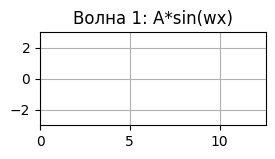

In [3]:
ax1 = plt.subplot(grid[0, 0])
wave1_line, = ax1.plot([], [], lw=2, color='blue')

ax1.set_title('Волна 1: A*sin(wx)')

ax1.set_xlim(0, 4*np.pi)
ax1.set_ylim(-3, 3)

ax1.grid(True)

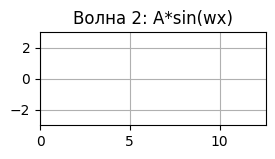

In [4]:
ax2 = plt.subplot(grid[1, 0])
wave2_line, = ax2.plot([], [], lw=2, color='green')

ax2.set_title('Волна 2: A*sin(wx)')

ax2.set_xlim(0, 4 * np.pi)
ax2.set_ylim(-3, 3)

ax2.grid(True)

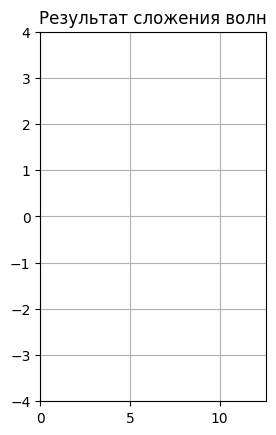

In [5]:
ax_result = plt.subplot(grid[:, 1])
result_line, = ax_result.plot([], [], lw=2, color='red')

ax_result.set_title('Результат сложения волн')

ax_result.set_xlim(0, 4*np.pi)
ax_result.set_ylim(-4, 4)

ax_result.grid(True)

In [1]:
x = np.linspace(0, 4*np.pi, 1000)

params = {
    'amp1': 1.0,
    'freq1': 1.0,
    'amp2': 1.0,
    'freq2': 1.0
}


def update_waves(amp1, freq1, amp2, freq2):
    params.update({
        'amp1': amp1,
        'freq1': freq1,
        'amp2': amp2,
        'freq2': freq2
    })
    
    y1 = params['amp1'] * np.sin(params['freq1'] * x)
    y2 = params['amp2'] * np.sin(params['freq2'] * x)
    y_result = y1 + y2
    

    wave1_line.set_data(x, y1)
    wave2_line.set_data(x, y2)
    result_line.set_data(x, y_result)
    
    ax1.set_ylim(-params['amp1']*1.2, params['amp1']*1.2)
    ax2.set_ylim(-params['amp2']*1.2, params['amp2']*1.2)
    ax_result.set_ylim(-(params['amp1']+params['amp2'])*1.2, 
                       (params['amp1']+params['amp2'])*1.2)
    
    plt.draw()


@interact(
    amp1=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Амплитуда 1:'),
    freq1=FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Частота 1:'),
    amp2=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Амплитуда 2:'),
    freq2=FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Частота 2:')
)
def update(amp1, freq1, amp2, freq2):
    update_waves(amp1, freq1, amp2, freq2)


update_waves(params['amp1'], params['freq1'], params['amp2'], params['freq2'])
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined